In [2]:
# Referred Notebook: https://www.kaggle.com/rajmehra03/a-comprehensive-guide-to-transfer-learning

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.vgg16 import VGG16

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
X=[] #images array
Z=[] #labels array

IMG_SIZE=150

#path variables
daisy = 'flowers/daisy'
sunflower = 'flowers/sunflower'
tulip ='flowers/tulip'
dandelion ='flowers/dandelion'
rose ='flowers/rose'

In [7]:
def assign_label(img,flower_type):
    return flower_type

In [8]:
def make_train_data(flower_type, directory):
    for img in tqdm(os.listdir(directory)):
        try:
            label=assign_label(img,flower_type)
            path = os.path.join(directory,img)
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            X.append(np.array(img))
            Z.append(str(label))
        except Exception as e:
            print("One bad image format found. Omitting this picture. \n\n", str(e))

In [9]:
make_train_data('Daisy',daisy)
print(len(X))

100%|██████████| 769/769 [00:02<00:00, 289.89it/s]

769


In [10]:
make_train_data('Sunflower',sunflower)
print(len(X))

100%|██████████| 734/734 [00:03<00:00, 237.84it/s]

1503


In [11]:
make_train_data('Tulip',tulip)
print(len(X))

100%|██████████| 984/984 [00:03<00:00, 260.85it/s]

2487


In [12]:
make_train_data('Dandelion',dandelion)
print(len(X))

  7%|▋         | 77/1055 [00:00<00:03, 247.59it/s]

One bad image format found. Omitting this picture. 

 OpenCV(4.3.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 71%|███████   | 745/1055 [00:02<00:01, 273.88it/s]

One bad image format found. Omitting this picture. 

 OpenCV(4.3.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



 79%|███████▉  | 837/1055 [00:03<00:00, 281.72it/s]

One bad image format found. Omitting this picture. 

 OpenCV(4.3.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



100%|██████████| 1055/1055 [00:03<00:00, 276.14it/s]

3539


In [13]:
make_train_data('Rose',rose)
print(len(X))

100%|██████████| 784/784 [00:02<00:00, 284.35it/s]

4323


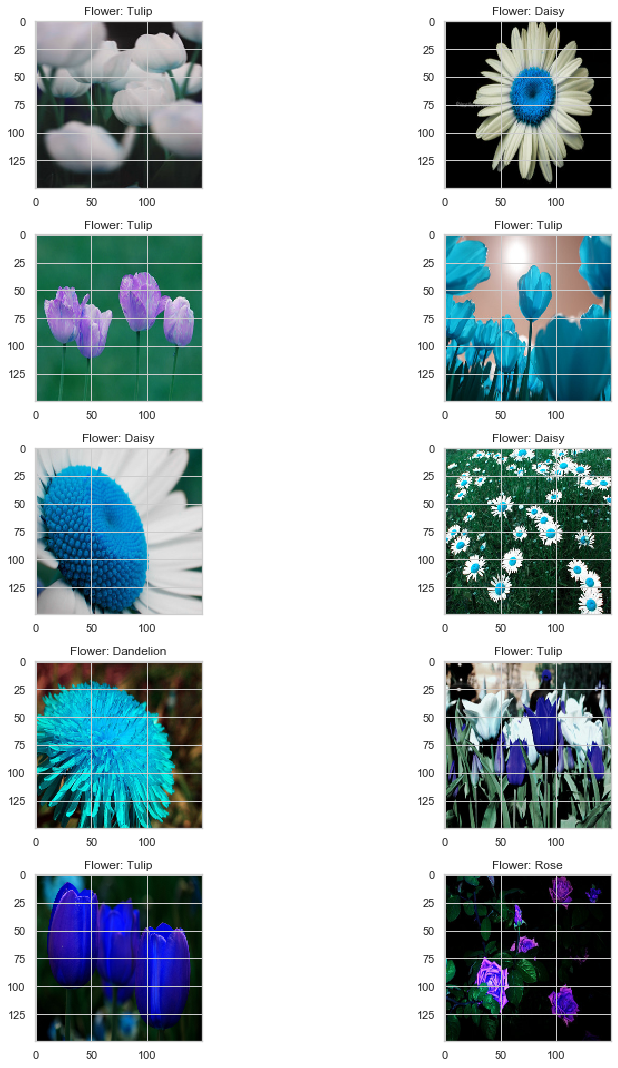

In [14]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [15]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

splitting the dataset 

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=42)

In [17]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [18]:
from keras.applications.resnet50 import ResNet50

 Conculsion:I will try to use the pretrained model of ResNet50 from imagenet. First I will get this pre-trained model, but then we have to execlude the top layer('include_top=False'), since we want to append our own model with it

In [19]:
base_model=ResNet50(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='avg')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [20]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [21]:
model=Sequential()
model.add(base_model)

model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [22]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [23]:
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=2, verbose=1)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 24,113,541
Trainable params: 24,060,421
Non-trainable params: 53,120
_________________________________________________________________


In [25]:
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])


In [26]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 5, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
32/32 [==============================] - 4071s 127s/step - loss: 0.6785 - acc: 0.7456 - val_loss: 1.7067 - val_acc: 0.1797
Epoch 2/5
32/32 [==============================] - 4907s 153s/step - loss: 0.2269 - acc: 0.9291 - val_loss: 1.7774 - val_acc: 0.2258
Epoch 3/5
32/32 [==============================] - 4987s 156s/step - loss: 0.1192 - acc: 0.9618 - val_loss: 1.7254 - val_acc: 0.2350
Epoch 4/5
32/32 [==============================] - 3272s 102s/step - loss: 0.0945 - acc: 0.9706 - val_loss: 1.6432 - val_acc: 0.2396
Epoch 5/5
32/32 [==============================] - 1197s 37s/step - loss: 0.0481 - acc: 0.9862 - val_loss: 1.6554 - val_acc: 0.2719


KeyError: 'val_accuracy'

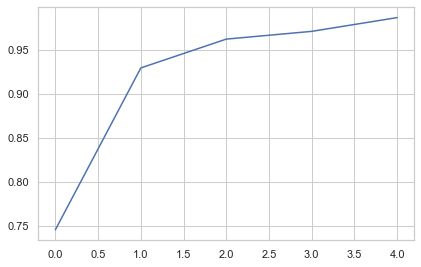

In [30]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

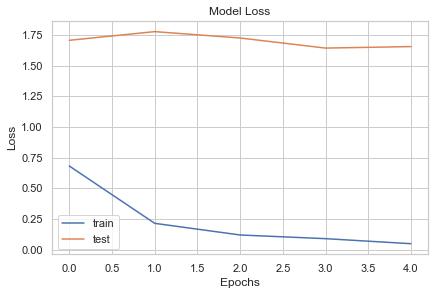

In [31]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()